# Questão 2

Para escolher os pontos de interpolação de $f(x)$ e de $g(x)$, vamos usar um gráfico para visualizar os três pontos mais próximos à região onde aparenta que ocorre a intersecção entre as funções.

In [156]:
using Plots

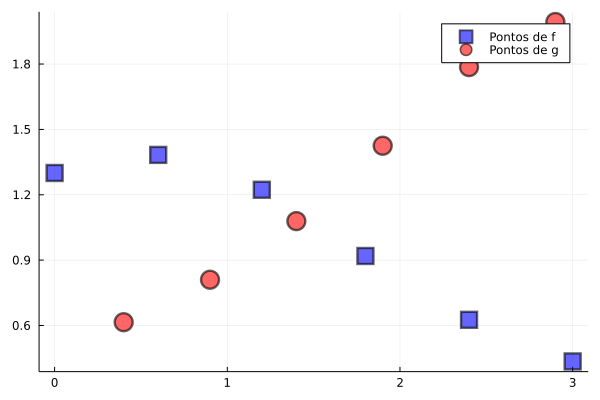

In [144]:
xf = [0, 0.6, 1.2, 1.8, 2.4, 3.0]
f = [1.300, 1.383, 1.223, 0.919, 0.626, 0.435]
scatter(xf, f, marker = (:square, 8, 0.6, :blue, stroke(3, 0.2, :black, :dot)), label = "Pontos de f")

xg = [0.4, 0.9, 1.4, 1.9, 2.4, 2.9]
g = [0.615, 0.810, 1.079, 1.425, 1.786, 1.993]
scatter!(xg, g, marker = (:circle, 10, 0.6, :red, stroke(3, 0.2, :black, :dot)), label = "Pontos de g")

Parece que devemos escolher três pontos seguidos, a partir do segundo ponto cada função. Com isso, podemos resolver o sistema da interpolação polinomial usando a funcionalidade nativa de Julia (a operação `\`).

In [145]:
xf = [0.6, 1.2, 1.8]
f = [1.383, 1.223, 0.919]

Af = [0.6^2 0.6 1
      1.2^2 1.2 1
      1.8^2 1.8 1]
cf = Af\f

3-element Vector{Float64}:
 -0.20000000000000012
  0.0933333333333336
  1.399

In [146]:
xg = [0.9, 1.4, 1.9]
g = [0.810, 1.079, 1.425]

Ag = [0.9^2 0.9 1
      1.4^2 1.4 1
      1.9^2 1.9 1]
cg = Ag\g

3-element Vector{Float64}:
 0.15400000000000033
 0.18379999999999908
 0.5198400000000006

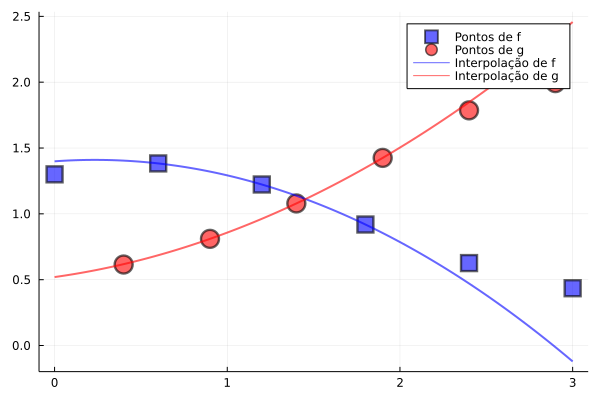

In [125]:
x =  LinRange(0, 3, 100)
F(x) = cf[1]*x^2 + cf[2]*x + cf[3]
G(x) = cg[1]*x^2 + cg[2]*x + cg[3]

plot!(x, F, linewidth = 2, linecolor = :blue, linealpha = 0.6, label = "Interpolação de f")
plot!(x, G, linewidth = 2, linecolor = :red, linealpha = 0.6, label = "Interpolação de g")

Achar o ponto de intersecção entre $f(x)$ e $g(x)$ é o mesmo que resolver a equação $f(x) - g(x) = 0$. Por isso, podemos definir um novo polinômio de grau 2 $h(x) = f(x) - g(x)$ e encontrar a sua raiz usando a fórmula de Bhaskara. 

In [148]:
ch = cf .- cg

function bhaskara(a, b, c)
    delta = b^2 - 4*a*c
    return (-b + sqrt(delta))/2a, (-b - sqrt(delta))/2a
end

x1, x2 = bhaskara(ch[1], ch[2], ch[3])

(-1.7088628435957345, 1.453307288040183)

In [149]:
H(x) = ch[1]*x^2 + ch[2]*x + ch[3]
H(x2) # será um valor muito próximo a 0

-2.220446049250313e-16